# Reporte de Práctica 11: Agrupamiento de datos

Para esta práctica solamente trabajamos con los datos del año 2017, los mismos que utilizamos la práctica pasada, salvo que se encontró el error “47”, era un string con muchos tabuladores y ocasionó error de conversión a float. En ésta práctica realizaremos clusters con de la información, no proporcionaremos etiquetas para clasificar, dejaremos que los datos por su propia naturaleza y aplicando distintos algoritmos se agrupen ellos mismos.  


## Objetivos

* Utiliza por dos algoritmos de agrupamiento.
* Reportar los hallazgos con gráficas y con medidas de calidad.

## Algoritmos de agrupamiento.
Utilizaremos los algoritmos de agrupamiento mostrados en [el tutorial de agrupamiento de scikit-learn](https://scikit-learn.org/stable/modules/clustering.html) y seleccionamos dos para aplicar. Usamos los siguientes:

*  K-Means
* Affinity Propagation

## Preparación de los datos

Primero tomamos los archivos originales y los procesamos fuera de la nube, producto de esta limpieza se generó el archivo "clasificacion2017.csv" en la práctica pasada.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("https://raw.githubusercontent.com/SamatarouKami/CIENCIA_DE_DATOS/master/clasificacion2017.csv")
print(len(df))


649


## Algoritmo K-Means

Éste algoritmo agrupa los datos al tratar de separar muestras en n grupos de igual varianza, minimizando un criterio conocido como la inercia o la suma de cuadrados dentro del grupo. Este algoritmo requiere que se especifique la cantidad de grupos. Se adapta bien a un gran número de muestras y se ha utilizado en una amplia gama de áreas de aplicación en muchos campos diferentes.

### Aplicación de K-Means

(428, 'integrantes en grupo', 0)
(221, 'integrantes en grupo', 1)


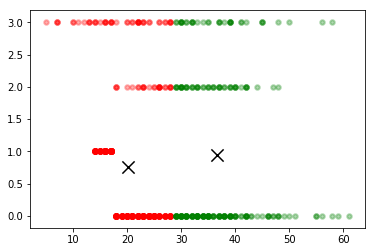

0.6081740309385313


In [2]:
from sklearn import metrics
from numpy.random import seed
from sklearn.cluster import KMeans
from numpy import isnan, nan, take, where

d = pd.read_csv("https://raw.githubusercontent.com/SamatarouKami/CIENCIA_DE_DATOS/master/clasificacion2017.csv")

cat = pd.Categorical(d.Categoria)
d.Categoria = cat.codes

gen = pd.Categorical(d.Genero)
d.Genero = gen.codes

pai = pd.Categorical(d.Pais)
d.Pais = pai.codes

sex = pd.Categorical(d.Sexo) 
d.Sexo = pai.codes

keep = ['Edad', 'Categoria', 'Sexo'] 
d = d.loc[:, keep]
d = d.dropna() 
x = d.values
k = 2
m = KMeans(init = 'random', n_clusters = k, n_init = 10)
m.fit(x)
centroides = m.cluster_centers_
grupos = m.predict(x)
plt.figure(1)
plt.scatter(centroides[:, 0], centroides[:, 1], marker='x', s=150, linewidths=3, color='black', zorder=10)
colores = ['r', 'g', 'b']
for g in range(k):
    incl = where(grupos == g)[0]
    print(len(incl), "integrantes en grupo", g)
    grupo = take(x, incl, 0)
    plt.scatter(grupo[:, 0], grupo[:, 1], marker='o', s=20, linewidths=2, color=colores[g], alpha = 0.3, zorder=5)
plt.show()
print(metrics.silhouette_score(x, grupos, metric='euclidean'))

Probemos con diferentes valores de k para ver cuál da el mejor valor de la coeficiente de silueta

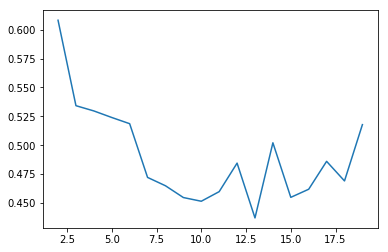

In [3]:
import pandas as pd
from sklearn import metrics
from numpy.random import seed
from numpy import isnan, nan, take, where
from sklearn.cluster import KMeans


d = pd.read_csv("https://raw.githubusercontent.com/SamatarouKami/CIENCIA_DE_DATOS/master/clasificacion2017.csv")

cat = pd.Categorical(d.Categoria)
d.Categoria = cat.codes

sex = pd.Categorical(d.Sexo) 
d.Sexo = pai.codes

keep =  ['Edad', 'Categoria', 'Sexo']  

d = d.loc[:, keep]
d = d.dropna() 
x = d.values
ks = [k for k in range(2, 20)]
sil = []
for k in ks:
    m = KMeans(init = 'random', n_clusters = k, n_init = 10)
    m.fit(x)
    sil.append(metrics.silhouette_score(x, m.predict(x), metric='euclidean'))
plt.figure(1)
plt.plot(ks, sil)
plt.show()



En definitiva, la gráfica nos muestra que el hacer el agrupamiento en dos grupos es el que obtiene la mejor calidad de agrupamiento, ya que no vuelve a crecer la calidad si hacemos la división en más grupos.

## Algoritmo AffinityPropagation

Éste algoritmo crea clústeres enviando mensajes entre pares de muestras hasta la convergencia. Luego se describe un conjunto de datos utilizando un pequeño número de ejemplares, que se identifican como los más representativos de otras muestras. Los mensajes enviados entre pares representan la idoneidad para que una muestra sea el ejemplar de la otra, que se actualiza en respuesta a los valores de otros pares. Esta actualización ocurre de manera iterativa hasta la convergencia, momento en el que se eligen los ejemplares finales y, por lo tanto, se proporciona la agrupación final.


### Aplicación de AffinityPropagation

(606, 'integrantes en grupo', 0)
(43, 'integrantes en grupo', 1)


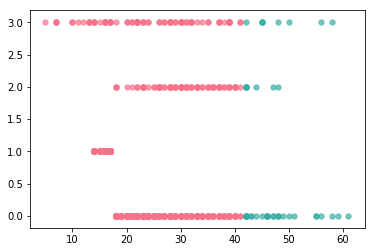

0.5498546010295401


In [9]:
import seaborn as sns
from numpy import take, where, unique, concatenate
from sklearn.cluster import AffinityPropagation
m = AffinityPropagation(damping = 0.9, convergence_iter = 30)

xVars =  ['Edad', 'Categoria', 'Sexo']  

d = d.loc[:, xVars]
x = d.values

c = m.fit(x)
grupos = c.labels_
plt.clf()
plt.figure(1)
k = len(unique(grupos))
colores = sns.color_palette("husl", k)
for g in range(k):
    incl = where(grupos == g)[0]
    print(len(incl), "integrantes en grupo", g)
    grupo = take(x, incl, 0)
    plt.scatter(grupo[:, 0], grupo[:, 1], marker='o', s=20, linewidths=2, color=colores[g], alpha = 0.6, zorder=5)
plt.show()
print(metrics.silhouette_score(x, grupos, metric='euclidean'))

## Conclusión
Al aplicar estos dos algoritmos de agrupamiento se puede notar que la mejor forma de agrupar estos datos es en dos grupos, aunque el K-Means tuvo una mejor calidad de solución al obtener 0.6081740309385313 y el AffinityPropagation obtuvo 0.5498546010295401. En K-Means se agrupan las edades en los de 29 años o menor, y los de 30 o mayor y en AffinityPropagation se agrupan en los de 41 años o menor y los de 42 o mayor.

--6 de Mayo 2019--
Luis Angel Gutierrez Rodriguez 1484412